# Guide for twinpy/analysis/shear_analyzer.py

In [1]:
%aiida
%reload_ext autoreload
%autoreload 2

In [35]:
import os
import sys
from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt
import twinpy
from twinpy.interfaces.aiida.vasp import AiidaRelaxWorkChain
from twinpy.interfaces.aiida.phonopy import AiidaPhonopyWorkChain
from twinpy.interfaces.aiida.shear import AiidaShearWorkChain
from twinpy.interfaces.aiida.twinboundary \
    import AiidaTwinBoudnaryRelaxWorkChain
from twinpy.analysis.shear_analyzer import ShearAnalyzer, TwinBoundaryShearAnalyzer
from twinpy.common.band_path import (get_seekpath,
                                     get_labels_band_paths_from_seekpath,
                                     get_band_paths_from_labels)
from twinpy.plot.band_structure import BandsPlot
from twinpy.plot.dos import TotalDosesPlot

jupyter_dir = os.path.join(os.path.dirname(twinpy.__file__), '..', 'jupyter')
sys.path.append(os.path.join(jupyter_dir, 'site-packages'))
from jupyter_help import show_info

shear_pk = 602881  # twinpy Mg_pv_PBE

# twinboundary_pk = 186343  # twinpy
# additional_relax_pks = [267977, 279276, 282215, 283951]   # twinpy
# twinboundary_phonon_pk = 286877  # twinpy
# twinboundary_shear_relax_pks = [326425, 297874, 297890, 297907, 297924]
# twinboundary_shear_phonon_pks = [326490, 299318, 300184, 300580, 300760]
# shear_strain_ratios = [0.00, 0.02, 0.04, 0.06, 0.08]

# class ShearAnalyzer

In [11]:
aiida_shear = AiidaShearWorkChain(load_node(shear_pk))
shear_analyzer = aiida_shear.get_shear_analyzer()
show_info(shear_analyzer, is_class=True)

====== START class information ======

# ---------
# docstring
# ---------

    Analize shear result.
    

# ----
# init
# ----

        Init.

        Args:
            shear_structure: ShearStructure class object.
            phonon_analyzers (list): List of PhononAnalyzer class object.

        Todo:
            Currently not supported the case the number of original_cells
            and input_cells changes because it is difficult to construct
            the relax cells in the original frame. But future fix this
            problem. One solution is to make attribute
            'self._original_primitive' which contains two atoms
            in the unit cell and original basis.
            Twinboundary shaer structure also use this class.
            If this is inconvenient, I have to create
            _BaseShaerAnalyzer, ShearAnalyzer TwinBoundaryShearAnalyzer
            classes separately.
        

# ---------------
# attribute names
# ---------------
['_relax_analyzers', '_p

In [18]:
shear_analyzer.run_mesh()

run mesh with [23 23 12]
run mesh with [24 24 12]
run mesh with [24 24 12]
run mesh with [24 24 12]
run mesh with [24 24 12]
run mesh with [24 24 12]
run mesh with [24 24 12]
run mesh with [24 24 12]
run mesh with [24 24 12]
run mesh with [24 24 12]
run mesh with [24 24 12]


In [36]:
tdoss = shear_analyzer.get_total_doses()

In [37]:
tds = TotalDosesPlot(tdoss)

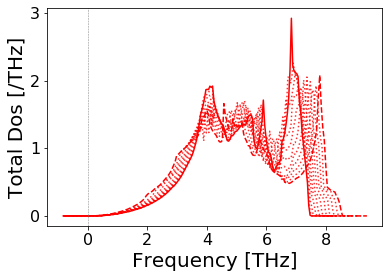

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
tds.plot_total_doses(ax=ax)

In [69]:
# labels_qpoints = get_seekpath(
#     shear_analyzer.phonon_analyzers[0].relax_analyzer.final_cell)['point_coords']
from twinpy.common.band_path import get_labels_for_twin
labels_qpoints = get_labels_for_twin()
# labels = ['GAMMA', 'M_2', 'L_2', 'A', '', 'GAMMA', 'K_2']
labels = ['GAMMA', 'M_1', 'L_1', 'A', '', 'GAMMA', 'K_1']
base_band_labels, base_band_paths = \
    get_band_paths_from_labels(
        labels=labels,
        labels_qpoints=labels_qpoints)

In [66]:
base_band_labels

['GAMMA', 'M_2', 'L_2', 'A', 'GAMMA', 'K_2']

(<Figure size 576x432 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7ff71ca6ccd0>])

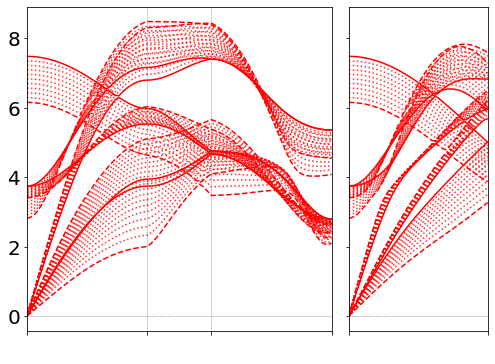

In [70]:
bands = shear_analyzer.get_band_structures(
    base_band_paths=base_band_paths)
bps = BandsPlot(bands)
bps.plot_band_structures()

(<Figure size 576x432 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7ff71cc876d0>])

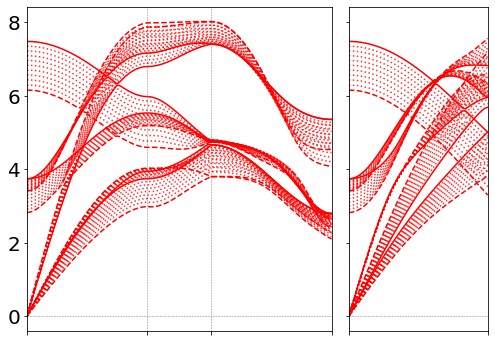

## def get_shear_diffs

In [8]:
show_info(analyzer.get_shear_diffs)
print("# keys")
print(list(analyzer.get_shear_diffs().keys()))
print("")
print("# data")
pprint(analyzer.get_shear_diffs())

====== START method information ======

# ---------
# docstring
# ---------

        Get structure diffs between original relax and sheared relax cells
        IN ORIGINAL FRAME.
        

======= END method information =======


# keys
['lattice_diffs', 'scaled_posi_diffs', 'cart_posi_diffs', 'cart_norm_diffs']

# data
{'cart_norm_diffs': array([[0.        , 0.        ],
       [0.00714224, 0.01728621],
       [0.01429876, 0.0345889 ],
       [0.02164887, 0.05178959],
       [0.02916089, 0.06891098],
       [0.03680118, 0.08598527],
       [0.04482185, 0.10285838],
       [0.05331891, 0.1194932 ],
       [0.06229214, 0.13589378],
       [0.07167288, 0.15213172],
       [0.0816008 , 0.16815133]]),
 'cart_posi_diffs': array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00573108, 0.00330882, 0.00268665],
        [0.00926612, 0.00534982, 0.01357687]],

       [[0.01149243, 0.00663514, 0.00532482],
        [0.01850197, 0.01068214, 0.0272

## def get_band_paths

In [10]:
show_info(analyzer.get_band_paths)
cell = analyzer.phonon_analyzers[0].primitive_cell
skp = get_seekpath(cell)
print("# You have to determine band paths for first cell.")
print("")
# print("# twin labels")
# pprint(get_labels_for_twin())
print("")
print("# seekpath output")
print("### path")
pprint(skp['path'])
print("")
print("### point coords")
pprint(skp['point_coords'])

# labels = ['GAMMA', 'M_2', 'L_2', 'A', '', 'GAMMA', 'K_2']
labels = ['GAMMA', 'M_1', 'L_1', 'A', '', 'GAMMA', 'K_1']
fixed_labels, band_paths = get_band_paths_from_labels(
                               labels=labels,
                               labels_qpoints=get_labels_for_twin())
print("")
print("Example:")
print("# labels")
print(labels)
print("")
print("# fixed labels")
print(fixed_labels)
print("")
print("# fixed labels, band_paths")
pprint(band_paths)

====== START method information ======

# ---------
# docstring
# ---------

        Get band paths for all shear cells from band paths for first cell.

        Args:
            base_band_paths (np.array): Path connections for first
                                             primitive standardized structure.

        Examples:
            >>> base_band_paths = [[[  0, 0, 0.5],
                                    [  0, 0, 0  ]],
                                   [[0.5, 0,   0],
                                    [0.5, 0, 0.5],
                                    [  0, 0, 0.5]]]

        Note:
            Get path_connections for each shear structure considering
            structure body rotation.
        

======= END method information =======


# You have to determine band paths for first cell.


# seekpath output
### path
[('GAMMA', 'M'),
 ('M', 'K'),
 ('K', 'GAMMA'),
 ('GAMMA', 'A'),
 ('A', 'L'),
 ('L', 'H'),
 ('H', 'A'),
 ('L', 'M'),
 ('H', 'K')]

### point coords
{'A': [0.0,

NameError: name 'get_labels_for_twin' is not defined

## def get_band_structures

====== START method information ======

# ---------
# docstring
# ---------

        Get BandStructure objects.

        Args:
            base_band_paths (np.array): Path connections for first
                                             primitive standardized structure.
            labels (list): Band labels for first band paths.
            npoints (int): The number of qpoints along the band path.
            with_eigenvectors (bool): If True, compute eigenvectors.

        Notes:
            Reciprocal lattices for each structure are set automatically.
            For more detail, see 'get_band_qpoints_and_path_connections'
            in phonopy.phonon.band_structure.
        

======= END method information =======




(<Figure size 576x432 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7f3400130f50>])

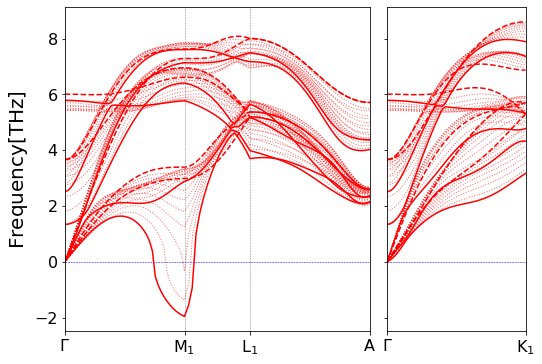

In [33]:
show_info(analyzer.get_band_structures)
band_structures = analyzer.get_band_structures(
    base_band_paths=band_paths,
    labels=fixed_labels,
    npoints=51,
    with_eigenvectors=False)
BandsPlot(band_structures).plot_band_structures()

# class TwinBoundaryShearAnalyzer

In [37]:
aiida_twinboundary_relax = AiidaTwinBoudnaryRelaxWorkChain(load_node(twinboundary_pk))
twinboundary_analyzer = aiida_twinboundary_relax.get_twinboundary_analyzer(
                            twinboundary_phonon_pk=twinboundary_phonon_pk,
                            additional_relax_pks=additional_relax_pks)

original_cells = []
for ratio in shear_strain_ratios:
    original_cell = twinboundary_analyzer.get_shear_cell(
        shear_strain_ratio=ratio,
        is_standardize=False)
    original_cells.append(original_cell)
    
phonon_analyzers = []
for i in range(len(original_cells)):
    aiida_relax = AiidaRelaxWorkChain(load_node(twinboundary_shear_relax_pks[i]))
    relax_analyzer = aiida_relax.get_relax_analyzer(original_cell=original_cells[i])
    aiida_phonon = AiidaPhonopyWorkChain(load_node(twinboundary_shear_phonon_pks[i]))
    phonon_analyzer = aiida_phonon.get_phonon_analyzer(relax_analyzer=relax_analyzer)
    phonon_analyzers.append(phonon_analyzer)

twinboundary_shear_analyzer = \
    twinboundary_analyzer.get_twinboundary_shear_analyzer(
        shear_phonon_analyzers=phonon_analyzers,
        shear_strain_ratios=shear_strain_ratios)

show_info(twinboundary_shear_analyzer, is_class=True)

====== START class information ======

# ---------
# docstring
# ---------

    Analize twinboundary shear result.
    

# ----
# init
# ----

        Init.

        Args:
            phonon_analyzers (list): List of PhononAnalyzer class object.
        

# ---------------
# attribute names
# ---------------
['_relax_analyzers', '_phonon_analyzers', '_shear_strain_ratios']

# ------
# values
# ------
{'_phonon_analyzers': [<twinpy.analysis.phonon_analyzer.PhononAnalyzer object at 0x7f33ffff0750>,
 '_relax_analyzers': [<twinpy.analysis.relax_analyzer.RelaxAnalyzer object at 0x7f33fd5440d0>,
 '_shear_strain_ratios': [0.0, 0.02, 0.04, 0.06, 0.08]}

======= END class information =======




## def get_atomic_environment

In [63]:
show_info(twinboundary_shear_analyzer.get_atomic_environment)
envs = twinboundary_shear_analyzer.get_atomic_environment()
print("# data num")
print(len(envs))
print("")
print("# first data")
pprint(envs[2][0])

====== START method information ======

# ---------
# docstring
# ---------

        Get plane coords from lower plane to upper plane.
        Return list of z coordinates of original cell frame.
        Plane coordinates (z coordinates) are fractional.
        

======= END method information =======


[ 0.          1.89710717  3.74827671  5.63493933  7.4965231   9.37212186
 11.24481651 13.12041526 14.98199903 16.86866166 18.71983119 20.61693836
 22.51404553 24.36521507 26.25187769 28.11346146 29.98906022 31.86175487
 33.73735362 35.59893739 37.48560002 39.33676955]
[ 0.7951914   2.86425702  4.65709629  6.56654847  8.43340317 10.30846918
 12.18353519 14.05038989 15.95984207 17.75268134 19.82174697 21.41414238
 23.47154975 25.28196867 27.18157337 29.0509287  30.92540754 32.79988638
 34.66924171 36.56884641 38.37926533 40.4366727 ]
[ 0.80119299  2.86903129  4.65249521  6.56750984  8.43291146 10.30846918
 12.18402691 14.04942852 15.96444315 17.74790707 19.81574537 21.42235411
 23.4678034

In [66]:
for relax_analyzer in twinboundary_shear_analyzer.relax_analyzers:
    pprint(relax_analyzer.final_cell_in_original_frame[1])

array([[0.5       , 0.19089084, 0.        ],
       [0.5       , 0.77502203, 0.        ],
       [0.5       , 0.67111932, 0.09688476],
       [0.5       , 0.25727972, 0.08492093],
       [0.        , 0.95088343, 0.05376225],
       [0.        , 0.49608494, 0.03825467],
       [0.5       , 0.13977765, 0.18921683],
       [0.5       , 0.72681942, 0.17439308],
       [0.        , 0.40807037, 0.14408109],
       [0.        , 0.98973005, 0.12923492],
       [0.5       , 0.60749996, 0.28013353],
       [0.5       , 0.19455507, 0.26528288],
       [0.        , 0.87372219, 0.23471712],
       [0.        , 0.4607773 , 0.21986647],
       [0.5       , 0.07854721, 0.37076508],
       [0.5       , 0.66020689, 0.35591891],
       [0.        , 0.34145784, 0.32560692],
       [0.        , 0.92849961, 0.31078317],
       [0.5       , 0.57219232, 0.46174533],
       [0.5       , 0.11739383, 0.44623775],
       [0.        , 0.81099754, 0.41507907],
       [0.        , 0.39715794, 0.40311524],
       [0.

## def plot_plane_diff

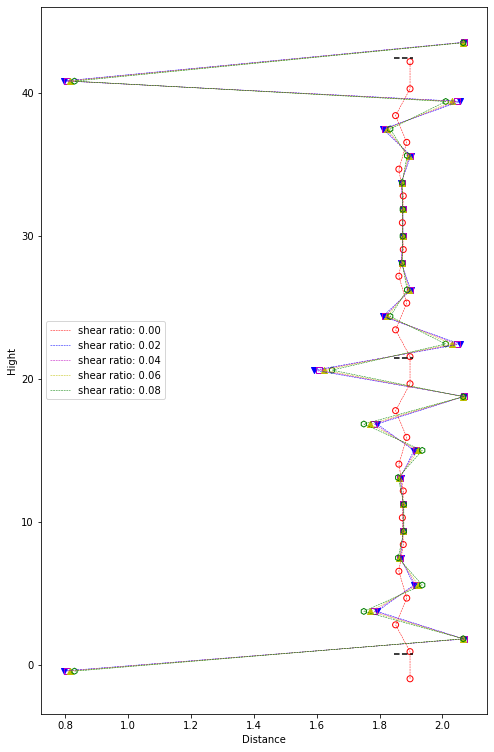

In [39]:
fig = twinboundary_shear_analyzer.plot_plane_diff()

## def plot_angle_diff

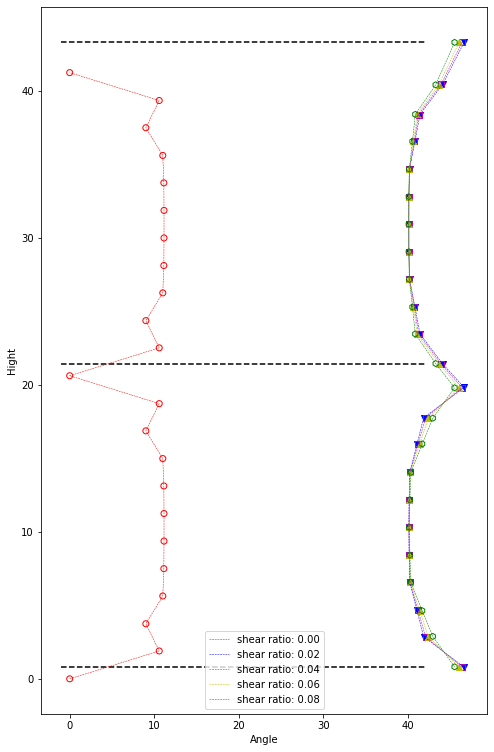

In [69]:
fig = twinboundary_shear_analyzer.plot_angle_diff()

## def plot_atom_diff

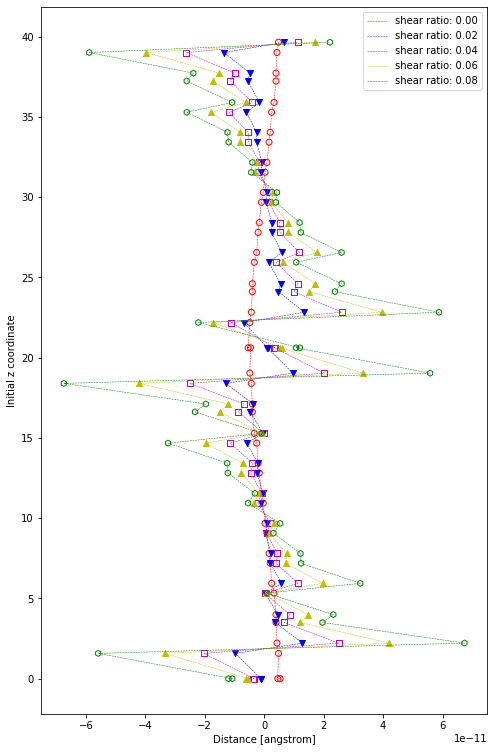

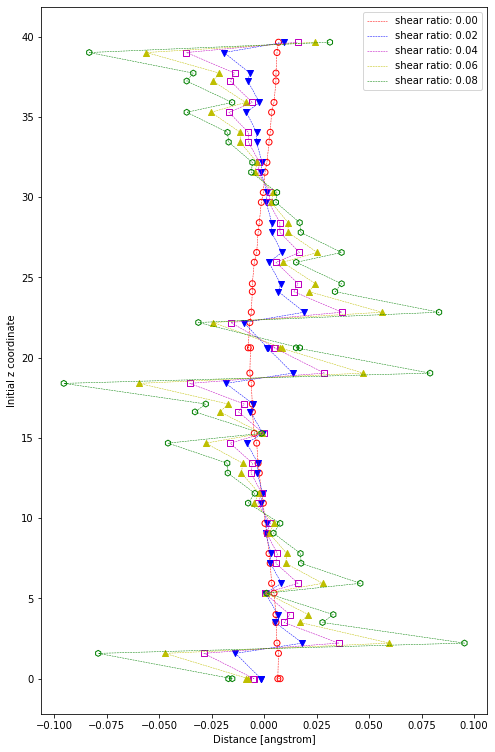

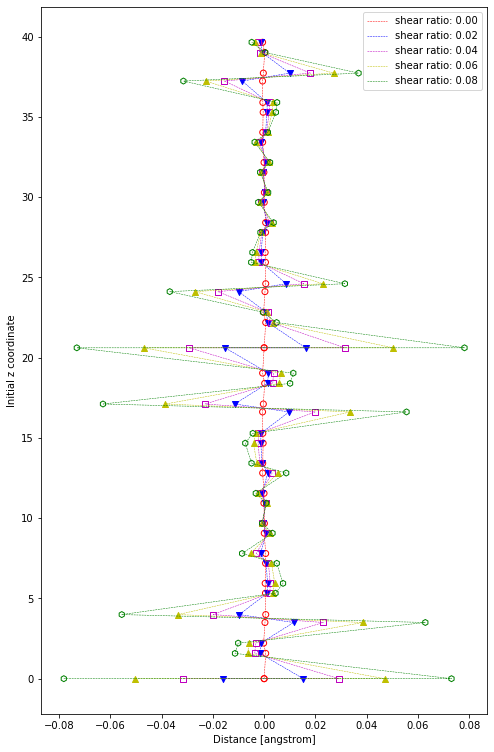

In [76]:
for direction in ['x', 'y', 'z']:
    fig = twinboundary_shear_analyzer.plot_atom_diff(
        direction=direction,
        shuffle=True)